Используем датасет по рукописным буквам английского языка, обучим модель, оценим ее предсказательные способности. Нарисуем графики точности и потерь для обучающей и тестовой выборки.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-6-0deb86694bad>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


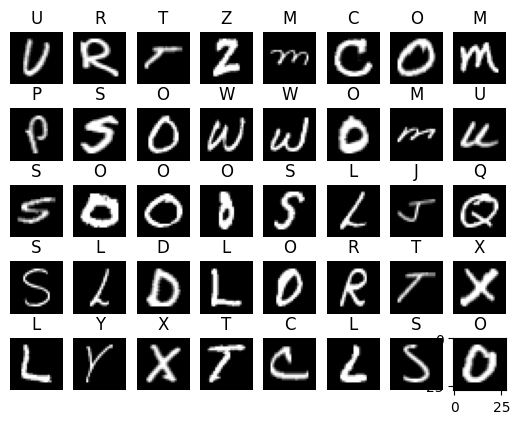

In [ ]:
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/8
4656/4656 [==============================] - 25s 5ms/step - loss: 0.2848 - accuracy: 0.9213 - val_loss: 0.1546 - val_accuracy: 0.9577
Epoch 2/8
4656/4656 [==============================] - 19s 4ms/step - loss: 0.1249 - accuracy: 0.9642 - val_loss: 0.1266 - val_accuracy: 0.9651
Epoch 3/8
4656/4656 [==============================] - 20s 4ms/step - loss: 0.0942 - accuracy: 0.9727 - val_loss: 0.0975 - val_accuracy: 0.9736
Epoch 4/8
4656/4656 [==============================] - 22s 5ms/step - loss: 0.0774 - accuracy: 0.9768 - val_loss: 0.0939 - val_accuracy: 0.9735
Epoch 5/8
4656/4656 [==============================] - 19s 4ms/step - loss: 0.0665 - accuracy: 0.9802 - val_loss: 0.0810 - val_accuracy: 0.9779
Epoch 6/8
4656/4656 [==============================] - 18s 4ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0821 - val_accuracy: 0.9780
Epoch 7/8
4656/4656 [==============================] - 22s 5ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0783 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc*100:.2f}%')

2328/2328 [==============================] - 6s 3ms/step - loss: 0.0729 - accuracy: 0.9808
Точность на тестовых данных: 98.08%


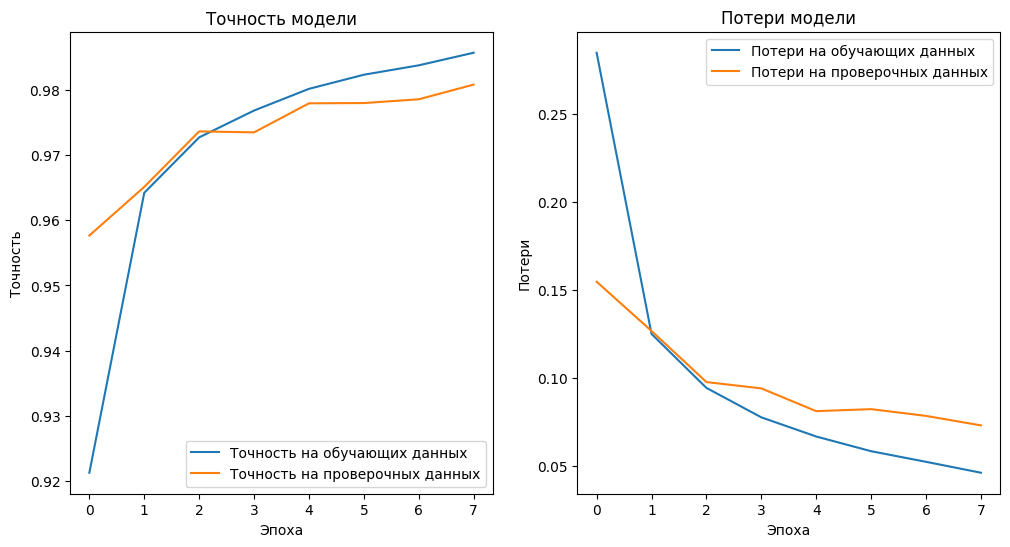

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на проверочных данных')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label='Потери на проверочных данных')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

# После 4 эпохи точность как и потери стали слишком медленно нарастать и падать соответственно.

# Самый оптимальный вариант был достигнут на 8 эпохе.